Preprocess the data
- data cleaning 

In [26]:
# Data Preprocessing Template
import dask.dataframe as dd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Load the entire dataset into a pandas dataframe

df = pd.read_csv("/nobackup/amimalik/bits-proj/dataset/dimensions/failed_devices_df.csv")

In [28]:
df.shape

(6325, 193)

In [29]:
df.head(10)

,date,serial_number,model,capacity_bytes,failure,datacenter,cluster_id,vault_id,pod_id,pod_slot_num,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2024-01-01,ZHZ4GD4Y,ST12000NM0008,1.200014e+13,0.0,phx1,0.0,1064.0,0.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-01-01,ZHZ3PMB1,ST12000NM0008,1.200014e+13,0.0,phx1,0.0,1064.0,8.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-01,ZHZ4NTLG,ST12000NM0008,1.200014e+13,0.0,phx1,0.0,1064.0,8.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-01-01,ZHZ4Q2RC,ST12000NM0008,1.200014e+13,0.0,phx1,0.0,1064.0,9.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-01-01,ZHZ41J2F,ST12000NM0008,1.200014e+13,0.0,phx1,0.0,1064.0,12.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2024-01-01,ZHZ511SW,ST12000NM0008,1.200014e+13,0.0,phx1,0.0,1064.0,15.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2024-01-01,ZHZ50QYT,ST12000NM0008,1.200014e+13,0.0,phx1,0.0,1065.0,0.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2024-01-01,ZHZ4VWV3,ST12000NM0008,1.200014e+13,0.0,phx1,0.0,1065.0,1.0,42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2024-01-01,ZHZ4XP6W,ST12000NM0008,1.200014e+13,0.0,phx1,0.0,1065.0,1.0,57.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2024-01-01,ZHZ4YETC,ST12000NM0008,1.200014e+13,0.0,phx1,0.0,1065.0,3.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# find the serial numbers of the drive by counting the number of times each serial number appears in the dataset
serial_number_counts = df['serial_number'].value_counts()
print(serial_number_counts)

serial_number
ZHZ3P3GX    90
ZHZ50QZN    88
ZHZ4VV6Y    87
ZL0051J0    87
ZHZ4WW43    86
            ..
ZHZ3X2LK     3
ZHZ50M4L     3
ZHZ6CF50     2
ZHZ4VQ82     1
ZHZ50R4E     1
Name: count, Length: 144, dtype: int64


In [31]:
# use the serial numbers which provides some decent time-series data to process

# find the serial numbers that appear more than 50 times in the dataset
serial_numbers_gt_50 = serial_number_counts[serial_number_counts > 50]

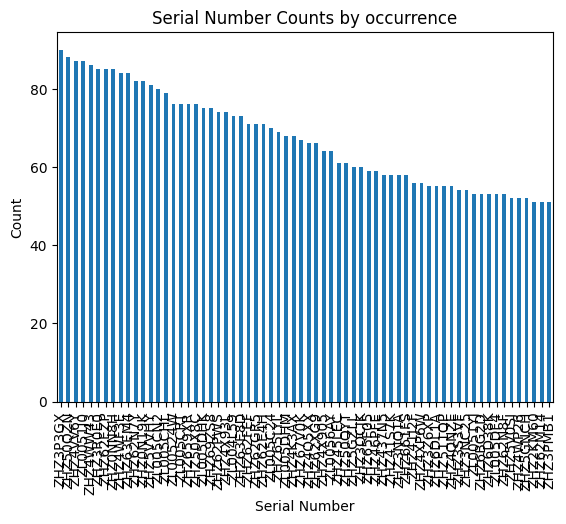

In [32]:
serial_numbers_gt_50.plot(kind='bar')
plt.xlabel('Serial Number')
plt.ylabel('Count')
plt.title('Serial Number Counts by occurrence')
plt.show()

In [33]:
# Get the list of serial numbers from serial_numbers_gt_50
serial_numbers = serial_numbers_gt_50.index.tolist()

# Find all instances and features from df based on the serial numbers
instances = df[df['serial_number'].isin(serial_numbers)]

In [34]:
instances.shape

(4434, 193)

In [35]:
instances.head(10)

,date,serial_number,model,capacity_bytes,failure,datacenter,cluster_id,vault_id,pod_id,pod_slot_num,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
1,2024-01-01,ZHZ3PMB1,ST12000NM0008,1.200014e+13,0.0,phx1,0.0,1064.0,8.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-01-01,ZHZ41J2F,ST12000NM0008,1.200014e+13,0.0,phx1,0.0,1064.0,12.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2024-01-01,ZHZ50QYT,ST12000NM0008,1.200014e+13,0.0,phx1,0.0,1065.0,0.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2024-01-01,ZHZ4XP6W,ST12000NM0008,1.200014e+13,0.0,phx1,0.0,1065.0,1.0,57.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,2024-01-01,ZHZ62N7Y,ST12000NM0008,1.200014e+13,0.0,phx1,0.0,1068.0,0.0,46.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,2024-01-01,ZHZ5VVHY,ST12000NM0008,1.200014e+13,0.0,phx1,0.0,1068.0,1.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,2024-01-01,ZHZ63EM4,ST12000NM0008,1.200014e+13,0.0,phx1,0.0,1068.0,2.0,48.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,2024-01-01,ZHZ62XG9,ST12000NM0008,1.200014e+13,0.0,phx1,0.0,1068.0,4.0,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,2024-01-01,ZHZ5GZLL,ST12000NM0008,1.200014e+13,0.0,phx1,0.0,1068.0,5.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,2024-01-01,ZHZ62M14,ST12000NM0008,1.200014e+13,0.0,phx1,0.0,1068.0,12.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
instances.columns

Index(['date', 'serial_number', 'model', 'capacity_bytes', 'failure',
       'datacenter', 'cluster_id', 'vault_id', 'pod_id', 'pod_slot_num',
       ...
       'smart_250_normalized', 'smart_250_raw', 'smart_251_normalized',
       'smart_251_raw', 'smart_252_normalized', 'smart_252_raw',
       'smart_254_normalized', 'smart_254_raw', 'smart_255_normalized',
       'smart_255_raw'],
      dtype='object', length=193)

In [37]:
# Drop columns which are marked as 'normalized' and other columns which do not provide any useful information

drop_column_list = [col for col in instances.columns if 'normalized' in col]
drop_column_list.append('capacity_bytes')
drop_column_list.append('datacenter')
drop_column_list.append('cluster_id')
drop_column_list.append('vault_id')
drop_column_list.append('pod_id')
drop_column_list.append('pod_slot_num')
drop_column_list.append('is_legacy_format')

print (drop_column_list)

ddf = instances.drop(drop_column_list, axis=1)

['smart_1_normalized', 'smart_2_normalized', 'smart_3_normalized', 'smart_4_normalized', 'smart_5_normalized', 'smart_7_normalized', 'smart_8_normalized', 'smart_9_normalized', 'smart_10_normalized', 'smart_11_normalized', 'smart_12_normalized', 'smart_13_normalized', 'smart_15_normalized', 'smart_16_normalized', 'smart_17_normalized', 'smart_18_normalized', 'smart_22_normalized', 'smart_23_normalized', 'smart_24_normalized', 'smart_27_normalized', 'smart_71_normalized', 'smart_82_normalized', 'smart_90_normalized', 'smart_160_normalized', 'smart_161_normalized', 'smart_163_normalized', 'smart_164_normalized', 'smart_165_normalized', 'smart_166_normalized', 'smart_167_normalized', 'smart_168_normalized', 'smart_169_normalized', 'smart_170_normalized', 'smart_171_normalized', 'smart_172_normalized', 'smart_173_normalized', 'smart_174_normalized', 'smart_175_normalized', 'smart_176_normalized', 'smart_177_normalized', 'smart_178_normalized', 'smart_179_normalized', 'smart_180_normalized'

In [38]:
ddf.columns

Index(['date', 'serial_number', 'model', 'failure', 'smart_1_raw',
       'smart_2_raw', 'smart_3_raw', 'smart_4_raw', 'smart_5_raw',
       'smart_7_raw', 'smart_8_raw', 'smart_9_raw', 'smart_10_raw',
       'smart_11_raw', 'smart_12_raw', 'smart_13_raw', 'smart_15_raw',
       'smart_16_raw', 'smart_17_raw', 'smart_18_raw', 'smart_22_raw',
       'smart_23_raw', 'smart_24_raw', 'smart_27_raw', 'smart_71_raw',
       'smart_82_raw', 'smart_90_raw', 'smart_160_raw', 'smart_161_raw',
       'smart_163_raw', 'smart_164_raw', 'smart_165_raw', 'smart_166_raw',
       'smart_167_raw', 'smart_168_raw', 'smart_169_raw', 'smart_170_raw',
       'smart_171_raw', 'smart_172_raw', 'smart_173_raw', 'smart_174_raw',
       'smart_175_raw', 'smart_176_raw', 'smart_177_raw', 'smart_178_raw',
       'smart_179_raw', 'smart_180_raw', 'smart_181_raw', 'smart_182_raw',
       'smart_183_raw', 'smart_184_raw', 'smart_187_raw', 'smart_188_raw',
       'smart_189_raw', 'smart_190_raw', 'smart_191_raw', 'sma

In [39]:
# Dropna columns with more than 5% missing values
threshold = len(df) * 0.05  # 5% threshold
ddf.dropna(thresh=threshold, axis=1, inplace=True)
ddf.columns

Index(['date', 'serial_number', 'model', 'failure', 'smart_1_raw',
       'smart_3_raw', 'smart_4_raw', 'smart_5_raw', 'smart_7_raw',
       'smart_9_raw', 'smart_10_raw', 'smart_12_raw', 'smart_18_raw',
       'smart_187_raw', 'smart_188_raw', 'smart_190_raw', 'smart_192_raw',
       'smart_193_raw', 'smart_194_raw', 'smart_195_raw', 'smart_197_raw',
       'smart_198_raw', 'smart_199_raw', 'smart_200_raw', 'smart_240_raw',
       'smart_241_raw', 'smart_242_raw'],
      dtype='object')

In [40]:
ddf.head(10)

,date,serial_number,model,failure,smart_1_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,...,smart_193_raw,smart_194_raw,smart_195_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_200_raw,smart_240_raw,smart_241_raw,smart_242_raw
1,2024-01-01,ZHZ3PMB1,ST12000NM0008,0.0,138772928.0,0.0,13.0,0.0,7.156963e+08,35965.0,...,1779.0,28.0,138772928.0,0.0,0.0,0.0,0.0,35718.0,1.116726e+11,6.516509e+11
4,2024-01-01,ZHZ41J2F,ST12000NM0008,0.0,106287768.0,0.0,16.0,24.0,9.192255e+08,35978.0,...,1725.0,35.0,106287768.0,0.0,0.0,0.0,0.0,35737.0,1.111946e+11,7.109347e+11
6,2024-01-01,ZHZ50QYT,ST12000NM0008,0.0,102188520.0,0.0,11.0,24.0,1.554267e+08,35367.0,...,1874.0,29.0,102188520.0,0.0,0.0,0.0,0.0,35134.0,1.123943e+11,6.474746e+11
8,2024-01-01,ZHZ4XP6W,ST12000NM0008,0.0,167088744.0,0.0,18.0,0.0,1.846816e+08,35376.0,...,2248.0,37.0,167088744.0,0.0,0.0,0.0,0.0,35074.0,1.119553e+11,7.287891e+11
14,2024-01-01,ZHZ62N7Y,ST12000NM0008,0.0,207000128.0,0.0,11.0,832.0,6.232224e+07,33685.0,...,2788.0,36.0,207000128.0,0.0,0.0,0.0,0.0,33258.0,1.132558e+11,6.454975e+11
15,2024-01-01,ZHZ5VVHY,ST12000NM0008,0.0,12401352.0,0.0,13.0,0.0,8.162592e+08,33686.0,...,2878.0,33.0,12401352.0,0.0,0.0,0.0,0.0,33237.0,1.111299e+11,7.179857e+11
18,2024-01-01,ZHZ63EM4,ST12000NM0008,0.0,194177440.0,0.0,12.0,368.0,7.843273e+08,33696.0,...,2753.0,38.0,194177440.0,0.0,0.0,0.0,0.0,33277.0,1.133024e+11,6.578891e+11
19,2024-01-01,ZHZ62XG9,ST12000NM0008,0.0,124863392.0,0.0,17.0,32.0,9.438324e+09,33690.0,...,2751.0,35.0,124863392.0,0.0,0.0,0.0,0.0,33261.0,1.113266e+11,7.003234e+11
21,2024-01-01,ZHZ5GZLL,ST12000NM0008,0.0,8518560.0,0.0,13.0,0.0,6.569060e+07,33700.0,...,2759.0,34.0,8518560.0,0.0,0.0,0.0,0.0,33279.0,1.100114e+11,7.132413e+11
24,2024-01-01,ZHZ62M14,ST12000NM0008,0.0,111419360.0,0.0,11.0,0.0,6.665780e+08,33792.0,...,2914.0,35.0,111419360.0,0.0,0.0,0.0,0.0,33279.0,1.125426e+11,6.390349e+11


Create a normalization column for each smart feature available

In [41]:
# Get the columns that contain "raw" in their name
raw_columns = [col for col in ddf.columns if 'raw' in col]

# Calculate the z-score for each raw column and store the values in new columns with the postfix "norm"
for col in raw_columns:
    norm_col = col.replace("raw", "norm")
    ddf[norm_col] = (ddf[col] - ddf[col].min()) / (ddf[col].max() - ddf[col].min())

# Print the updated dataframe
ddf.head(10)

,date,serial_number,model,failure,smart_1_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,...,smart_193_norm,smart_194_norm,smart_195_norm,smart_197_norm,smart_198_norm,smart_199_norm,smart_200_norm,smart_240_norm,smart_241_norm,smart_242_norm
1,2024-01-01,ZHZ3PMB1,ST12000NM0008,0.0,138772928.0,0.0,13.0,0.0,7.156963e+08,35965.0,...,0.150570,0.321429,0.568362,0.0,0.0,0.0,NaN,0.914780,0.832188,0.806507
4,2024-01-01,ZHZ41J2F,ST12000NM0008,0.0,106287768.0,0.0,16.0,24.0,9.192255e+08,35978.0,...,0.145645,0.571429,0.435246,0.0,0.0,0.0,NaN,0.915294,0.827499,0.881598
6,2024-01-01,ZHZ50QYT,ST12000NM0008,0.0,102188520.0,0.0,11.0,24.0,1.554267e+08,35367.0,...,0.159234,0.357143,0.418448,0.0,0.0,0.0,NaN,0.898980,0.839266,0.801217
8,2024-01-01,ZHZ4XP6W,ST12000NM0008,0.0,167088744.0,0.0,18.0,0.0,1.846816e+08,35376.0,...,0.193342,0.642857,0.684393,0.0,0.0,0.0,NaN,0.897357,0.834961,0.904213
14,2024-01-01,ZHZ62N7Y,ST12000NM0008,0.0,207000128.0,0.0,11.0,832.0,6.232224e+07,33685.0,...,0.242590,0.607143,0.847940,0.0,0.0,0.0,NaN,0.848227,0.847716,0.798713
15,2024-01-01,ZHZ5VVHY,ST12000NM0008,0.0,12401352.0,0.0,13.0,0.0,8.162592e+08,33686.0,...,0.250798,0.500000,0.050523,0.0,0.0,0.0,NaN,0.847658,0.826864,0.890529
18,2024-01-01,ZHZ63EM4,ST12000NM0008,0.0,194177440.0,0.0,12.0,368.0,7.843273e+08,33696.0,...,0.239398,0.678571,0.795396,0.0,0.0,0.0,NaN,0.848741,0.848174,0.814409
19,2024-01-01,ZHZ62XG9,ST12000NM0008,0.0,124863392.0,0.0,17.0,32.0,9.438324e+09,33690.0,...,0.239216,0.571429,0.511364,0.0,0.0,0.0,NaN,0.848308,0.828794,0.868158
21,2024-01-01,ZHZ5GZLL,ST12000NM0008,0.0,8518560.0,0.0,13.0,0.0,6.569060e+07,33700.0,...,0.239945,0.535714,0.034612,0.0,0.0,0.0,NaN,0.848795,0.815893,0.884520
24,2024-01-01,ZHZ62M14,ST12000NM0008,0.0,111419360.0,0.0,11.0,0.0,6.665780e+08,33792.0,...,0.254081,0.571429,0.456274,0.0,0.0,0.0,NaN,0.848795,0.840721,0.790527


In [42]:
# Drop columns with "raw" in their name
drop_column_list = [col for col in ddf.columns if 'raw' in col]
ddf = ddf.drop(drop_column_list, axis=1)

In [43]:
ddf.columns

Index(['date', 'serial_number', 'model', 'failure', 'smart_1_norm',
       'smart_3_norm', 'smart_4_norm', 'smart_5_norm', 'smart_7_norm',
       'smart_9_norm', 'smart_10_norm', 'smart_12_norm', 'smart_18_norm',
       'smart_187_norm', 'smart_188_norm', 'smart_190_norm', 'smart_192_norm',
       'smart_193_norm', 'smart_194_norm', 'smart_195_norm', 'smart_197_norm',
       'smart_198_norm', 'smart_199_norm', 'smart_200_norm', 'smart_240_norm',
       'smart_241_norm', 'smart_242_norm'],
      dtype='object')

In [44]:
ddf.describe()

,failure,smart_1_norm,smart_3_norm,smart_4_norm,smart_5_norm,smart_7_norm,smart_9_norm,smart_10_norm,smart_12_norm,smart_18_norm,...,smart_193_norm,smart_194_norm,smart_195_norm,smart_197_norm,smart_198_norm,smart_199_norm,smart_200_norm,smart_240_norm,smart_241_norm,smart_242_norm
count,4434.000000,4433.000000,0.0,4433.000000,4433.000000,4433.000000,4433.000000,0.0,4433.000000,0.0,...,4433.000000,4433.000000,4433.000000,4433.000000,4433.000000,4433.000000,0.0,4433.000000,4433.000000,4433.000000
mean,0.014885,0.499254,NaN,0.159028,0.019675,0.014702,0.867888,NaN,0.155347,NaN,...,0.352433,0.450493,0.499254,0.008293,0.008293,0.014437,NaN,0.853745,0.812728,0.615341
std,0.121106,0.291268,NaN,0.145846,0.075036,0.086467,0.131066,NaN,0.145140,NaN,...,0.309837,0.199354,0.291268,0.041363,0.041363,0.119298,NaN,0.113810,0.131246,0.182439
min,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
25%,0.000000,0.247241,NaN,0.069444,0.000000,0.000606,0.847205,NaN,0.069444,NaN,...,0.147013,0.321429,0.247241,0.000000,0.000000,0.000000,NaN,0.837216,0.808532,0.500950
50%,0.000000,0.497086,NaN,0.138889,0.000000,0.001199,0.893770,NaN,0.138889,NaN,...,0.223438,0.464286,0.497086,0.000000,0.000000,0.000000,NaN,0.865406,0.850216,0.574863
75%,0.000000,0.752216,NaN,0.180556,0.003499,0.002134,0.934655,NaN,0.180556,NaN,...,0.303146,0.607143,0.752216,0.000000,0.000000,0.000000,NaN,0.898520,0.870999,0.716984
max,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000


In [45]:
# copy the ddf for further processing
df = ddf.copy() # create a copy of the dataframe

ddf.drop('date', axis=1, inplace=True) 
ddf.drop('serial_number', axis=1, inplace=True) 
ddf.drop('model', axis=1, inplace=True)
df.drop('model', axis=1, inplace=True) 

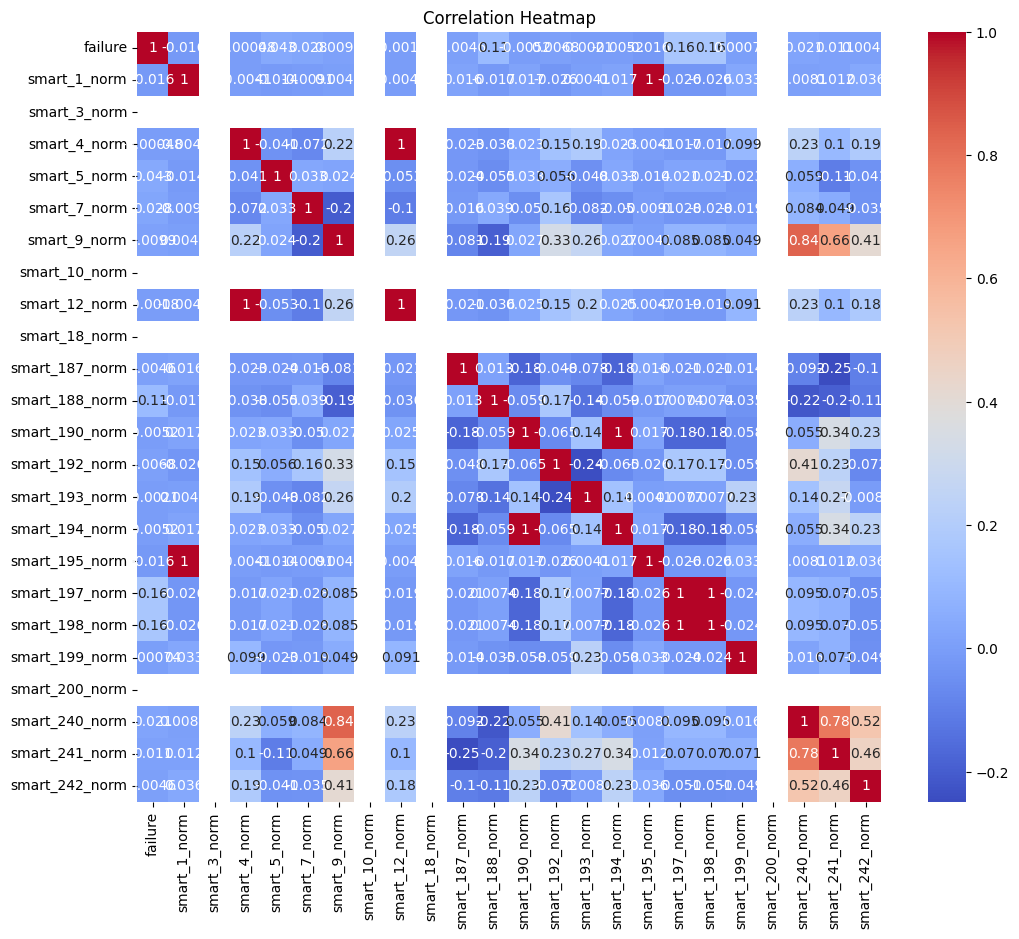

In [46]:
# Create a correlation matrix
corr_matrix = ddf.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title and display the plot
plt.title('Correlation Heatmap')
plt.show()

In [47]:
drop_column_list = []
drop_column_list.append('smart_3_norm')
drop_column_list.append('smart_10_norm')
drop_column_list.append('smart_18_norm')
drop_column_list.append('smart_200_norm')
# drop the columns with high correlation
drop_column_list.append('smart_12_norm')
drop_column_list.append('smart_194_norm')
drop_column_list.append('smart_195_norm')
drop_column_list.append('smart_197_norm')
drop_column_list.append('smart_241_norm') 
drop_column_list.append('smart_242_norm') 

ddf.drop(drop_column_list, axis=1, inplace=True)

df.drop(drop_column_list, axis=1, inplace=True)

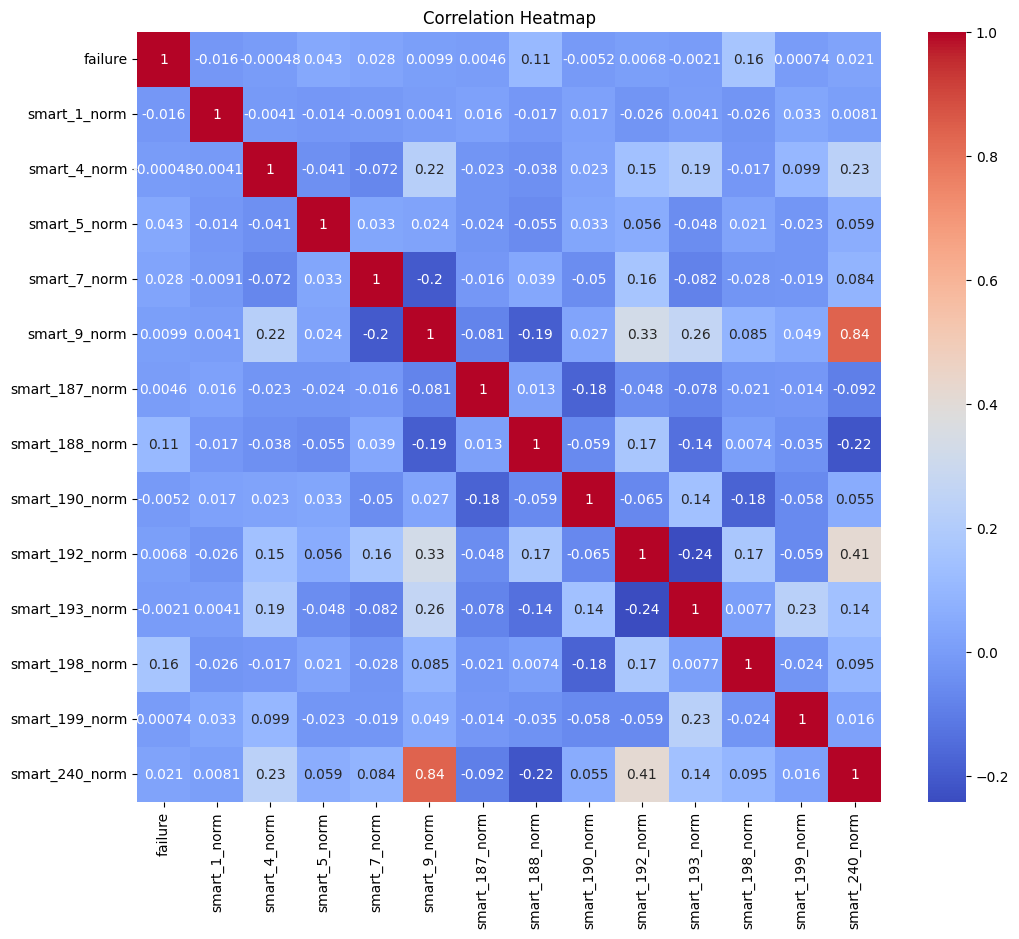

In [48]:
# Create a correlation matrix
corr_matrix = ddf.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title and display the plot
plt.title('Correlation Heatmap')
plt.show()

In [49]:
ddf.columns

Index(['failure', 'smart_1_norm', 'smart_4_norm', 'smart_5_norm',
       'smart_7_norm', 'smart_9_norm', 'smart_187_norm', 'smart_188_norm',
       'smart_190_norm', 'smart_192_norm', 'smart_193_norm', 'smart_198_norm',
       'smart_199_norm', 'smart_240_norm'],
      dtype='object')

In [50]:
ddf.rename(columns={'failure':'failure', 'smart_1_norm' :'Read_Error_Rate', 'smart_4_norm':'Start_Stop_Count', 'smart_5_norm':'Reallocated_Sectors_Count',
                          'smart_7_norm':'Seek_Error_Rate', 'smart_9_norm':'Power-On_Hours', 'smart_187_norm':'Reported_Uncorrectable_Errors', 'smart_188_norm':'Command_Timeout',
                          'smart_190_norm':'Temperature_Difference', 'smart_192_norm':'Power-off_Retract_Count', 'smart_193_norm':'Load_Unload_Cycle', 'smart_198_norm':'Offline_Uncorrectable',
                          'smart_199_norm':'UltraDMA_CRC_Error_Count', 'smart_240_norm':'Head_Flying_Hours'}, inplace=True)


df.rename(columns={'failure':'failure', 'serial_number':'serial_number', 'smart_1_norm' :'Read_Error_Rate', 'smart_4_norm':'Start_Stop_Count', 'smart_5_norm':'Reallocated_Sectors_Count',
                          'smart_7_norm':'Seek_Error_Rate', 'smart_9_norm':'Power-On_Hours', 'smart_187_norm':'Reported_Uncorrectable_Errors', 'smart_188_norm':'Command_Timeout',
                          'smart_190_norm':'Temperature_Difference', 'smart_192_norm':'Power-off_Retract_Count', 'smart_193_norm':'Load_Unload_Cycle', 'smart_198_norm':'Offline_Uncorrectable',
                          'smart_199_norm':'UltraDMA_CRC_Error_Count', 'smart_240_norm':'Head_Flying_Hours'}, inplace=True)

df.columns                          

Index(['date', 'serial_number', 'failure', 'Read_Error_Rate',
       'Start_Stop_Count', 'Reallocated_Sectors_Count', 'Seek_Error_Rate',
       'Power-On_Hours', 'Reported_Uncorrectable_Errors', 'Command_Timeout',
       'Temperature_Difference', 'Power-off_Retract_Count',
       'Load_Unload_Cycle', 'Offline_Uncorrectable',
       'UltraDMA_CRC_Error_Count', 'Head_Flying_Hours'],
      dtype='object')

In [51]:
# sorting by serial number and then by date, to get the failure as last value (end of cycle)
df = df.sort_values(['serial_number','date'])

df.reset_index(inplace=True, drop=True)

In [53]:
df.head()

,date,serial_number,failure,Read_Error_Rate,Start_Stop_Count,Reallocated_Sectors_Count,Seek_Error_Rate,Power-On_Hours,Reported_Uncorrectable_Errors,Command_Timeout,Temperature_Difference,Power-off_Retract_Count,Load_Unload_Cycle,Offline_Uncorrectable,UltraDMA_CRC_Error_Count,Head_Flying_Hours
0,2024-01-01,ZHZ0N19K,0.0,0.623688,0.083333,0.0,0.000645,0.938621,0.0,0.0,0.428571,0.761803,0.185226,0.0,0.0,0.932392
1,2024-01-02,ZHZ0N19K,0.0,0.217878,0.083333,0.0,0.000653,0.939414,0.0,0.0,0.464286,0.763948,0.185408,0.0,0.0,0.933231
2,2024-01-03,ZHZ0N19K,0.0,0.051171,0.083333,0.0,0.000659,0.939798,0.0,0.0,0.464286,0.763948,0.185408,0.0,0.0,0.933663
3,2024-01-04,ZHZ0N19K,0.0,0.047147,0.083333,0.0,0.000669,0.940617,0.0,0.0,0.392857,0.763948,0.185682,0.0,0.0,0.934502
4,2024-01-05,ZHZ0N19K,0.0,0.048253,0.083333,0.0,0.000678,0.941000,0.0,0.0,0.357143,0.763948,0.185682,0.0,0.0,0.934935


In [54]:
fails = df[df['failure'] == 1].index.values

rev_fails = fails[::-1]
shift_fails = np.roll(fails[::-1], shift=-1)
shift_fails[-1] = 0
fails_dif = fails[::-1] - shift_fails

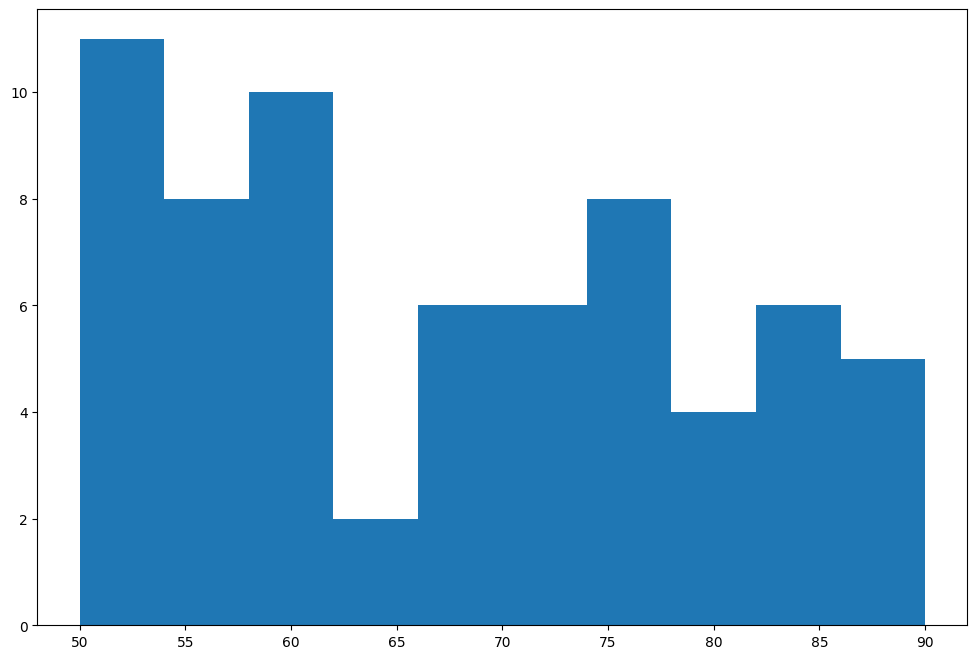

In [55]:
counts, bins = np.histogram(fails_dif)
plt.figure(figsize=(12,8))
plt.hist(bins[:-1], bins, weights=counts)
plt.show()